<a href="https://colab.research.google.com/github/RomanMykolaichuk/DB2020/blob/master/cnn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mask detection CNN training

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from distutils.dir_util import copy_tree
copy_tree("/content/drive/MyDrive/data/mask1", "/content")

['/content/test/Mask_Mouth_Chin/905.jpg',
 '/content/test/Mask_Mouth_Chin/926.jpg',
 '/content/test/Mask_Mouth_Chin/904.jpg',
 '/content/test/Mask_Mouth_Chin/973.jpg',
 '/content/test/Mask_Mouth_Chin/902.jpg',
 '/content/test/Mask_Mouth_Chin/932.jpg',
 '/content/test/Mask_Mouth_Chin/955.jpg',
 '/content/test/Mask_Mouth_Chin/957.jpg',
 '/content/test/Mask_Mouth_Chin/976.jpg',
 '/content/test/Mask_Mouth_Chin/996.jpg',
 '/content/test/Mask_Mouth_Chin/882.jpg',
 '/content/test/Mask_Mouth_Chin/890.jpg',
 '/content/test/Mask_Mouth_Chin/856.jpg',
 '/content/test/Mask_Mouth_Chin/873.jpg',
 '/content/test/Mask_Mouth_Chin/909.jpg',
 '/content/test/Mask_Mouth_Chin/923.jpg',
 '/content/test/Mask_Mouth_Chin/997.jpg',
 '/content/test/Mask_Mouth_Chin/921.jpg',
 '/content/test/Mask_Mouth_Chin/946.jpg',
 '/content/test/Mask_Mouth_Chin/962.jpg',
 '/content/test/Mask_Mouth_Chin/948.jpg',
 '/content/test/Mask_Mouth_Chin/995.jpg',
 '/content/test/Mask_Mouth_Chin/980.jpg',
 '/content/test/Mask_Mouth_Chin/98

In [6]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 5 directories and 0 images in 'train'.
There are 0 directories and 850 images in 'train/Correct'.
There are 0 directories and 827 images in 'train/Without_Mask'.
There are 0 directories and 522 images in 'train/Mask_Nose_Mouth'.
There are 0 directories and 849 images in 'train/Mask_Mouth_Chin'.
There are 0 directories and 850 images in 'train/Mask_Chin'.


In [7]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("test"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 5 directories and 0 images in 'test'.
There are 0 directories and 150 images in 'test/Correct'.
There are 0 directories and 139 images in 'test/Without_Mask'.
There are 0 directories and 93 images in 'test/Mask_Nose_Mouth'.
There are 0 directories and 150 images in 'test/Mask_Mouth_Chin'.
There are 0 directories and 150 images in 'test/Mask_Chin'.


In [8]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['Correct' 'Mask_Chin' 'Mask_Mouth_Chin' 'Mask_Nose_Mouth' 'Without_Mask']


In [9]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (762, 762)


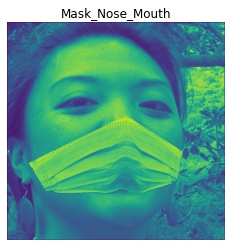

In [10]:
# View a random image from the training dataset
img = view_random_image(target_dir="train/",
                        target_class="Mask_Nose_Mouth")

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "train/"
test_dir = "test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)


Found 3898 images belonging to 5 classes.
Found 682 images belonging to 5 classes.


In [12]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224,3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(5, activation="softmax") # activation output
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
122/122 [==============================] - 34s 154ms/step - loss: 0.5996 - accuracy: 0.7771 - val_loss: 0.1617 - val_accuracy: 0.9384
Epoch 2/5
122/122 [==============================] - 18s 149ms/step - loss: 0.0873 - accuracy: 0.9736 - val_loss: 0.1131 - val_accuracy: 0.9663
Epoch 3/5
122/122 [==============================] - 18s 150ms/step - loss: 0.0372 - accuracy: 0.9908 - val_loss: 0.1627 - val_accuracy: 0.9487
Epoch 4/5
122/122 [==============================] - 18s 149ms/step - loss: 0.0178 - accuracy: 0.9959 - val_loss: 0.1635 - val_accuracy: 0.9531
Epoch 5/5
122/122 [==============================] - 18s 149ms/step - loss: 0.0092 - accuracy: 0.9979 - val_loss: 0.1423 - val_accuracy: 0.9604


In [13]:
model_1.save("model1.h5")



## Data augmentation

In [14]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Setup data augmentation
data_augmentation = Sequential([
  preprocessing.RandomFlip("vertical"), # randomly flip images
  preprocessing.RandomRotation(0.2), # randomly rotate images by a specific amount
  preprocessing.RandomHeight(0.2), # randomly adjust the height of an image by a specific amount
  preprocessing.RandomWidth(0.2), # randomly adjust the width of an image by a specific amount
  preprocessing.RandomZoom(0.2), # randomly zoom into an image
  # preprocessing.Rescaling(255) # keep for models like ResNet50V2, remove for EfficientNet
], name="data_augmentation")

## Transfer learning 1

In [15]:
len(class_names)

5

In [16]:
# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
# train_datagen = ImageDataGenerator(rescale=1./255)
# valid_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = ImageDataGenerator()
valid_datagen = ImageDataGenerator()

# Setup the train and test directories
train_dir = "train/"
test_dir = "test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

Found 3898 images belonging to 5 classes.
Found 682 images belonging to 5 classes.


In [17]:
# Setup base model and freeze its layers (this will extract features)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer") # shape of input image
x = data_augmentation(inputs) # augment images (only happens during training)
# x=inputs
x = base_model(x, training=False) # put the base model in inference mode so we can use it to extract features without updating the weights
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x) # pool the outputs of the base model
outputs = layers.Dense(len(class_names), activation="softmax", name="output_layer")(x) # same number of outputs as classes
model2 = tf.keras.Model(inputs, outputs)

16719872/16705208 [==============================] - 1s 0us/step


In [18]:
# Compile
model2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(), # use Adam with default settings
              metrics=["accuracy"])

# Fit
history_model2 = model2.fit(train_data,
                                           epochs=5, # fit for 5 epochs to keep experiments quick
                                           validation_data=valid_data,
                                           validation_steps=int(len(valid_data)))

Epoch 1/5
122/122 [==============================] - 47s 339ms/step - loss: 0.6984 - accuracy: 0.7891 - val_loss: 0.4408 - val_accuracy: 0.8607
Epoch 2/5
122/122 [==============================] - 33s 272ms/step - loss: 0.3240 - accuracy: 0.9153 - val_loss: 0.3127 - val_accuracy: 0.9062
Epoch 3/5
122/122 [==============================] - 29s 232ms/step - loss: 0.2523 - accuracy: 0.9292 - val_loss: 0.2665 - val_accuracy: 0.9238
Epoch 4/5
122/122 [==============================] - 27s 219ms/step - loss: 0.2130 - accuracy: 0.9420 - val_loss: 0.2498 - val_accuracy: 0.9282
Epoch 5/5
122/122 [==============================] - 27s 218ms/step - loss: 0.1865 - accuracy: 0.9474 - val_loss: 0.2242 - val_accuracy: 0.9340


In [20]:
model2.save("model2.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [24]:
initial_epoch=5

base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile the model (always recompile after any adjustments to a model)
model2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

In [25]:
history3=model2.fit(train_data,
            epochs=initial_epoch +5,
            validation_data=valid_data,
            initial_epoch=initial_epoch)

Epoch 6/10
122/122 [==============================] - 30s 202ms/step - loss: 0.0363 - accuracy: 0.9872 - val_loss: 0.1887 - val_accuracy: 0.9384
Epoch 7/10
122/122 [==============================] - 23s 192ms/step - loss: 0.0369 - accuracy: 0.9861 - val_loss: 0.1818 - val_accuracy: 0.9384
Epoch 8/10
122/122 [==============================] - 23s 187ms/step - loss: 0.0388 - accuracy: 0.9864 - val_loss: 0.1882 - val_accuracy: 0.9370
Epoch 9/10
122/122 [==============================] - 23s 190ms/step - loss: 0.0362 - accuracy: 0.9890 - val_loss: 0.1890 - val_accuracy: 0.9428
Epoch 10/10
122/122 [==============================] - 22s 179ms/step - loss: 0.0305 - accuracy: 0.9908 - val_loss: 0.2143 - val_accuracy: 0.9355


In [26]:
# model_1.save("model1.h5")
model2.save("model3.h5")


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [32]:
# Setup base model and freeze its layers (this will extract features)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer") # shape of input image
# x = data_augmentation(inputs) # augment images (only happens during training)
x=inputs
x = base_model(x, training=False) # put the base model in inference mode so we can use it to extract features without updating the weights
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x) # pool the outputs of the base model
outputs = layers.Dense(len(class_names), activation="softmax", name="output_layer")(x) # same number of outputs as classes
model3 = tf.keras.Model(inputs, outputs)

In [33]:
# Compile
model3.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(), # use Adam with default settings
              metrics=["accuracy"])

# Fit
history_model3 = model3.fit(train_data,
                                           epochs=5, # fit for 5 epochs to keep experiments quick
                                           validation_data=valid_data,
                                           validation_steps=int(len(valid_data)))

Epoch 1/5
122/122 [==============================] - 25s 169ms/step - loss: 0.3878 - accuracy: 0.9130 - val_loss: 0.1727 - val_accuracy: 0.9604
Epoch 2/5
122/122 [==============================] - 19s 158ms/step - loss: 0.1081 - accuracy: 0.9800 - val_loss: 0.1102 - val_accuracy: 0.9707
Epoch 3/5
122/122 [==============================] - 19s 157ms/step - loss: 0.0698 - accuracy: 0.9869 - val_loss: 0.0868 - val_accuracy: 0.9736
Epoch 4/5
122/122 [==============================] - 19s 158ms/step - loss: 0.0516 - accuracy: 0.9900 - val_loss: 0.0741 - val_accuracy: 0.9780
Epoch 5/5
122/122 [==============================] - 19s 158ms/step - loss: 0.0413 - accuracy: 0.9918 - val_loss: 0.0691 - val_accuracy: 0.9795


In [34]:
model3.save("model3a.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


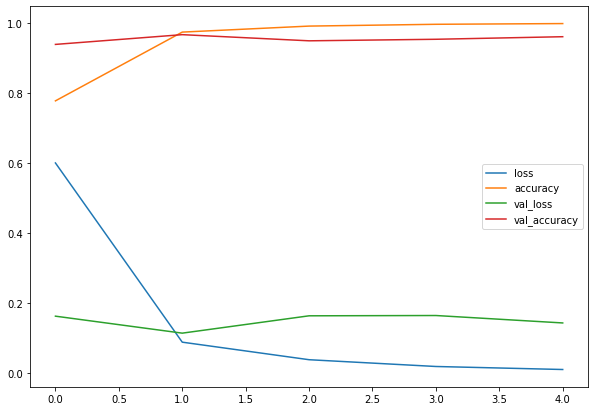

In [27]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

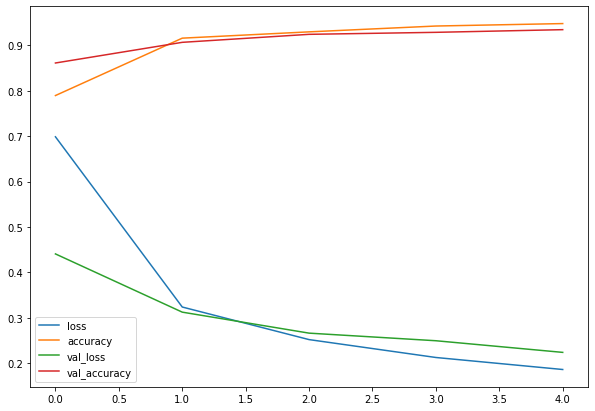

In [30]:

pd.DataFrame(history_model2.history).plot(figsize=(10, 7));

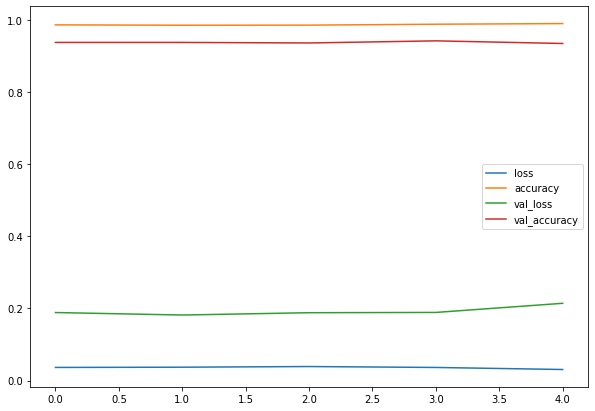

In [31]:
pd.DataFrame(history3.history).plot(figsize=(10, 7));

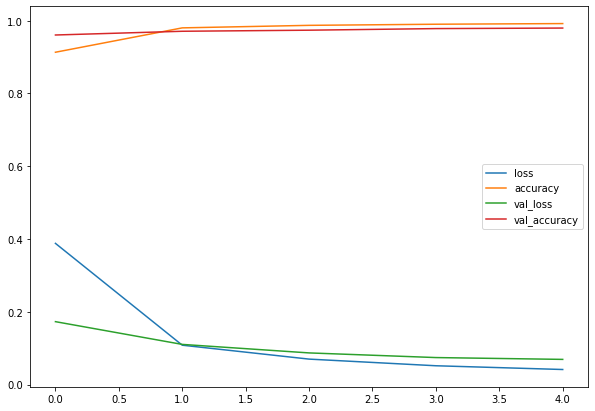

In [35]:
pd.DataFrame(history_model3.history).plot(figsize=(10, 7));